In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('database (1).csv',sep='|')[['Name','md5','SizeOfCode','legitimate']]
df

,Name,md5,SizeOfCode,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,779776,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,21504,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,33792,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,23552,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,87040,1
...,...,...,...,...
10536,VirusShare_622e962ebf6da7ac26aee84873682bce,622e962ebf6da7ac26aee84873682bce,89600,0
10537,VirusShare_70111012bb702b4cc13c52f7ceb3df91,70111012bb702b4cc13c52f7ceb3df91,24576,0
10538,VirusShare_d7be59aca809b313c1f5c53bcbf38214,d7be59aca809b313c1f5c53bcbf38214,28672,0
10539,Name,md5,SizeOfCode,legitimate


# New Section

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.drop(10539,inplace=True)

In [7]:
df

,Name,md5,SizeOfCode,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,779776,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,21504,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,33792,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,23552,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,87040,1
...,...,...,...,...
10534,VirusShare_dd619efac1cea076816815b2f6220a6d,dd619efac1cea076816815b2f6220a6d,40960,0
10535,VirusShare_c93fb2f6ef3a92dc0a0d33fc3f8668a9,c93fb2f6ef3a92dc0a0d33fc3f8668a9,286720,0
10536,VirusShare_622e962ebf6da7ac26aee84873682bce,622e962ebf6da7ac26aee84873682bce,89600,0
10537,VirusShare_70111012bb702b4cc13c52f7ceb3df91,70111012bb702b4cc13c52f7ceb3df91,24576,0


In [8]:
df['legitimate'] = df['legitimate'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10539 entries, 0 to 10538
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        10539 non-null  object
 1   md5         10539 non-null  object
 2   SizeOfCode  10539 non-null  object
 3   legitimate  10539 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 411.7+ KB


In [10]:
# categorical_feature = df[['Name']]

# # Initialize and fit OneHotEncoder
# encoder = OneHotEncoder(sparse=False)  # sparse=False for dense array output
# encoded_data = encoder.fit_transform(categorical_feature)

# # Convert the encoded data into DataFrame
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Name']))

# # Concatenate the encoded DataFrame with the original DataFrame
# df_encoded = pd.concat([encoded_df,df], axis=1)

# # Drop the original categorical feature
# df_encoded.drop('Name', axis=1, inplace=True)

In [11]:
df

,Name,md5,SizeOfCode,legitimate
0,Windows.Internal.Shell.Broker.dll,09e83f1d1c99ad33009dbe6fb129c2d9,779776,1
1,hidserv.dll,3030f19c6a73367d6d5eedd157f5d01a,21504,1
2,DmApiSetExtImplDesktop.dll,8271846f8f5dd1cfddaa957b1b9da1a2,33792,1
3,FSResizerSetup27.exe,5802b4215566bb9593a736e945a28e99,23552,1
4,asc-setup.exe,8cb1fb45489d065720285deeccbacd98,87040,1
...,...,...,...,...
10534,VirusShare_dd619efac1cea076816815b2f6220a6d,dd619efac1cea076816815b2f6220a6d,40960,0
10535,VirusShare_c93fb2f6ef3a92dc0a0d33fc3f8668a9,c93fb2f6ef3a92dc0a0d33fc3f8668a9,286720,0
10536,VirusShare_622e962ebf6da7ac26aee84873682bce,622e962ebf6da7ac26aee84873682bce,89600,0
10537,VirusShare_70111012bb702b4cc13c52f7ceb3df91,70111012bb702b4cc13c52f7ceb3df91,24576,0


In [12]:
X = df.drop('legitimate', axis=1)
y = df.iloc[:,3]

In [13]:
y

,legitimate
0,1
1,1
2,1
3,1
4,1
...,...
10534,0
10535,0
10536,0
10537,0


In [14]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


categorical_features = ['Name']  # Categorical feature names
categorical_transformer = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(sparse_output=False,drop='First'))
])


In [15]:
scalable_feature = ['SizeOfCode']
Scaling_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Ridge(alpha=1.0)))  # L2 Regularization Feature Selection
])


In [16]:
import seaborn as sns

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('sc', Scaling_transformer, scalable_feature)
    ]
)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5,weights='distance'))
])
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

In [19]:
from sklearn import set_config
set_config(display='diagram')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Name,md5,SizeOfCode
9217,VirusShare_4a5af56097f78ef6a4e8060d38961608,4a5af56097f78ef6a4e8060d38961608,1298944
2935,werui.dll,046d0c2ef0eae7fb1a6ddeb457a2cd01,300544
871,Dot3Conn.dll,de7edb4fde33e67019cc20b3da1cf3ee,14336
1263,wlancfg.dll,30bc3228a9dd2e0f6a5ba78b336a8a57,204800
1618,dxgi.dll,1cb14c76f967e5279779c19bdcc2c3a2,443392
...,...,...,...
5734,VirusShare_636c6b545bedd4d48b6966e8c86e2ff7,636c6b545bedd4d48b6966e8c86e2ff7,405504
5191,VirusShare_8d57b2e0c51943a8c3e8cacbe8dc80ce,8d57b2e0c51943a8c3e8cacbe8dc80ce,712192
5390,VirusShare_48dc08f801f69a396b72062f450640c1,48dc08f801f69a396b72062f450640c1,638976
860,EnterpriseAppMgmtClient.dll,169a0f8ad952a73c875d87bea1a7dec2,4096


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import plotly.express as px
# Train the model
from sklearn.model_selection import cross_val_score
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('sc',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('feature_selection',
                                                                   SelectFromModel(estimator=Ridge()))]),
                                                  ['SizeOfCode'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_s...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [22]:
y_pred1 = pipeline1.predict(X_test)
y_pred2= pipeline2.predict(X_test)
y_pred3= pipeline3.predict(X_test)

Random Forest Performance:
Accuracy: 0.7842
Precision: 0.6896
Recall: 0.6597
F1 Score: 0.6743
ROC-AUC Score: 0.7538



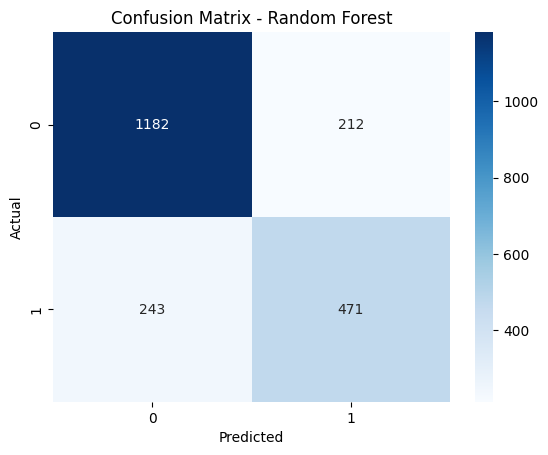

K-Nearest Neighbors Performance:
Accuracy: 0.7804
Precision: 0.6970
Recall: 0.6218
F1 Score: 0.6573
ROC-AUC Score: 0.7417



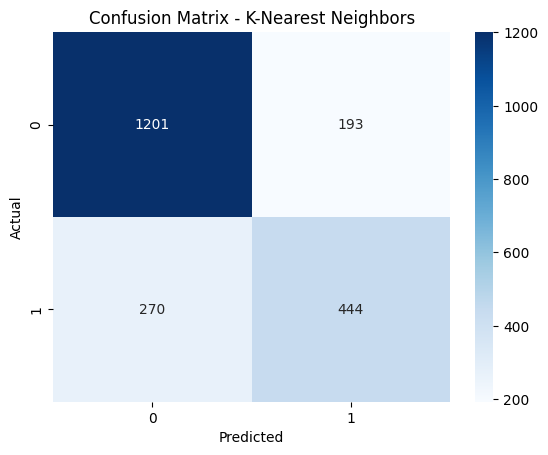

XGBoost Performance:
Accuracy: 0.7609
Precision: 0.6733
Recall: 0.5714
F1 Score: 0.6182
ROC-AUC Score: 0.7147



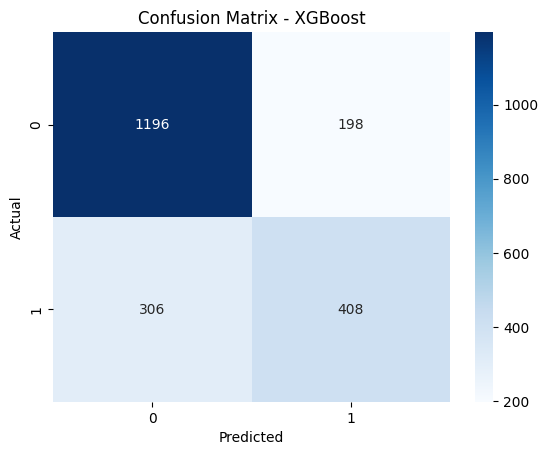

Cross valuation after 15 times : RF 81.33903133903134% , KNN 71.12375533428164% , XGB 78.2051282051282% 


In [23]:

# Evaluate the model
def evaluate_model(y_true, y_pred,model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"ROC-AUC Score: {auc:.4f}\n")

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()



evaluate_model(y_test, y_pred1, "Random Forest")
evaluate_model(y_test, y_pred2, "K-Nearest Neighbors")
evaluate_model(y_test, y_pred3,"XGBoost")


scores1 = cross_val_score(pipeline1, X, y, cv=15)
scores2 = cross_val_score(pipeline2, X, y, cv=15)
scores3 = cross_val_score(pipeline3, X, y, cv=15)
print(f"Cross valuation after 15 times : RF {max(scores1*100)}% , KNN {max(scores2*100)}% , XGB {max(scores3*100)}% ")

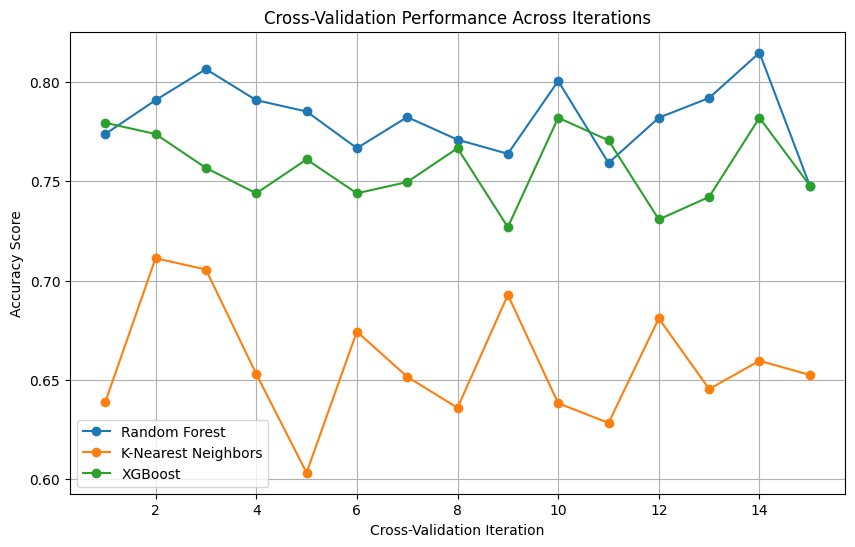

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": pipeline1,
    "K-Nearest Neighbors": pipeline2,
    "XGBoost": pipeline3
}

cv_folds = 15  # Number of cross-validation folds

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv_folds)

    plt.plot(range(1, cv_folds + 1), scores, marker='o', linestyle='-', label=f'{model_name}')

plt.xlabel("Cross-Validation Iteration")
plt.ylabel("Accuracy Score")
plt.title("Cross-Validation Performance Across Iterations")
plt.legend()
plt.grid(True)
plt.show()

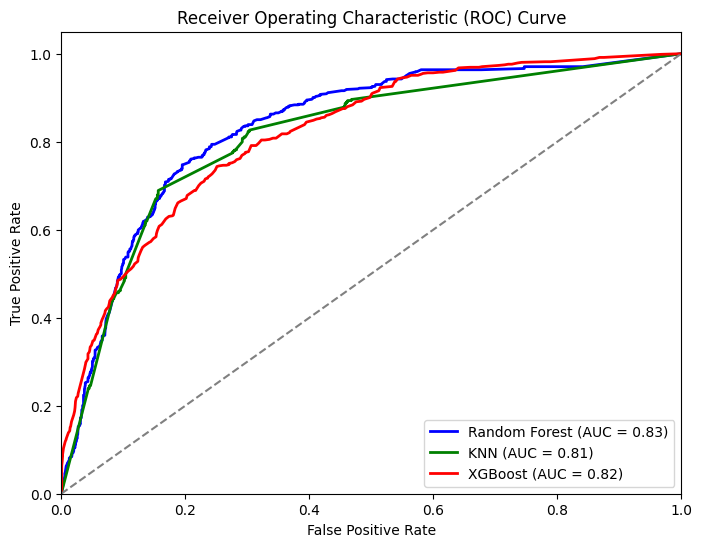

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_prob1 = pipeline1.predict_proba(X_test)[:, 1]
y_pred_prob2 = pipeline2.predict_proba(X_test)[:, 1]
y_pred_prob3 = pipeline3.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8,6))

# Plot AUC curves for each model
for y_pred_prob, model_name, color in zip(
    [y_pred_prob1, y_pred_prob2, y_pred_prob3],
    ["Random Forest", "KNN", "XGBoost"],
    ["blue", "green", "red"]
):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [26]:
from sklearn.decomposition import PCA

In [27]:
y_train

,legitimate
9217,0
2935,1
871,1
1263,1
1618,1
...,...
5734,0
5191,0
5390,0
860,1


In [28]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train['Name'],y=X_train['SizeOfCode'],z=X_train['md5'],
                 color=y_train_trf)
fig.update_layout(
margin=dict(l=20,r=20,t=20,b=20)
)
fig.show()

In [29]:
df=pd.read_csv('database (1).csv',sep='|')
df = df.drop(columns=['Name'])
df

,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,56256,...,2,3.07205024587,2.7068325827,3.43726790904,604.0,200,1008,256,16,1
1,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,22816,...,3,3.05620444095,2.70945678674,3.46549875518,515.333333333,200,932,256,16,1
2,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,32192,...,1,3.4664736915,3.4664736915,3.4664736915,980.0,980,980,256,16,1
3,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,12515,...,9,3.03214310792,1.97133528531,5.10247221166,363.444444444,34,744,0,0,1
4,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,91076,...,19,4.40226547736,2.69913115291,6.60033169334,3275.47368421,16,33512,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10536,622e962ebf6da7ac26aee84873682bce,332,224,8450,9,0,89600,55808,0,84470,...,50,2.4882680804,0.960953135828,5.02069508289,257.64,20,1254,72,16,0
10537,70111012bb702b4cc13c52f7ceb3df91,332,224,271,6,0,24576,141824,2048,13146,...,15,1.93371433713,0.0,5.26917349991,1210.66666667,104,4264,0,0,0
10538,d7be59aca809b313c1f5c53bcbf38214,332,224,770,12,0,28672,4096,65536,19440,...,1,4.91161451574,4.91161451574,4.91161451574,381.0,381,381,0,0,0
10539,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate


In [30]:
df.drop_duplicates(inplace=True)
df

,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,09e83f1d1c99ad33009dbe6fb129c2d9,34404,240,8226,14,12,779776,253952,0,56256,...,2,3.07205024587,2.7068325827,3.43726790904,604.0,200,1008,256,16,1
1,3030f19c6a73367d6d5eedd157f5d01a,34404,240,8226,14,12,21504,13312,0,22816,...,3,3.05620444095,2.70945678674,3.46549875518,515.333333333,200,932,256,16,1
2,8271846f8f5dd1cfddaa957b1b9da1a2,34404,240,8226,14,12,33792,27648,0,32192,...,1,3.4664736915,3.4664736915,3.4664736915,980.0,980,980,256,16,1
3,5802b4215566bb9593a736e945a28e99,332,224,271,6,0,23552,164864,1024,12515,...,9,3.03214310792,1.97133528531,5.10247221166,363.444444444,34,744,0,0,1
4,8cb1fb45489d065720285deeccbacd98,332,224,33167,2,25,87040,71680,0,91076,...,19,4.40226547736,2.69913115291,6.60033169334,3275.47368421,16,33512,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,c93fb2f6ef3a92dc0a0d33fc3f8668a9,332,224,258,14,11,286720,1044992,0,151104,...,31,4.04113998112,1.07394633647,7.54478360065,26745.6129032,118,406584,152,16,0
10536,622e962ebf6da7ac26aee84873682bce,332,224,8450,9,0,89600,55808,0,84470,...,50,2.4882680804,0.960953135828,5.02069508289,257.64,20,1254,72,16,0
10537,70111012bb702b4cc13c52f7ceb3df91,332,224,271,6,0,24576,141824,2048,13146,...,15,1.93371433713,0.0,5.26917349991,1210.66666667,104,4264,0,0,0
10538,d7be59aca809b313c1f5c53bcbf38214,332,224,770,12,0,28672,4096,65536,19440,...,1,4.91161451574,4.91161451574,4.91161451574,381.0,381,381,0,0,0


In [31]:
scaler=StandardScaler()

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
categorical_features = ['md5']

# Define the preprocessing pipeline with OneHotEncoder and sparse=False
categorical_transformer = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(sparse_output=False))
])

# Apply ColumnTransformer to apply OneHotEncoder to the specified column(s)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')  # remainder='passthrough' ensures that other columns are not affected

# Apply the preprocessor to your DataFrame
df_encoded = preprocessor.fit_transform(df)


In [33]:
df1=pd.DataFrame(df_encoded)
df1

,0,1,2,3,4,5,6,7,8,9,...,10577,10578,10579,10580,10581,10582,10583,10584,10585,10586
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3.07205024587,2.7068325827,3.43726790904,604.0,200,1008,256,16,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3.05620444095,2.70945678674,3.46549875518,515.333333333,200,932,256,16,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3.4664736915,3.4664736915,3.4664736915,980.0,980,980,256,16,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,3.03214310792,1.97133528531,5.10247221166,363.444444444,34,744,0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19,4.40226547736,2.69913115291,6.60033169334,3275.47368421,16,33512,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31,4.04113998112,1.07394633647,7.54478360065,26745.6129032,118,406584,152,16,0
10529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50,2.4882680804,0.960953135828,5.02069508289,257.64,20,1254,72,16,0
10530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15,1.93371433713,0.0,5.26917349991,1210.66666667,104,4264,0,0,0
10531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4.91161451574,4.91161451574,4.91161451574,381.0,381,381,0,0,0


In [34]:
df1.drop(10532,inplace=True)


In [35]:
X = df1.drop(10586, axis=1)
y = df1[10586]
y

,10586
0,1
1,1
2,1
3,1
4,1
...,...
10527,0
10528,0
10529,0
10530,0


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train = scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [38]:
pca = PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [39]:
X_train_trf

array([[ 4.32955062,  0.55787474, -1.0349817 ],
       [ 4.47913733,  0.12212021, -0.78500894],
       [-0.72272613,  1.42808235,  5.48140906],
       ...,
       [-1.34419909,  1.1997564 ,  5.47828932],
       [ 3.79996992,  0.22193714, -0.63047512],
       [-0.06384601,  0.66413196,  1.51583907]])

In [40]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [119]:
pca = PCA(n_components=10)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.fit_transform(X_test)

In [120]:
X_train_trf

array([[ 4.32947233,  0.55795447, -1.03111381, ...,  0.49857197,
         0.04693099, -0.07103853],
       [ 4.47917086,  0.12221998, -0.78679345, ..., -0.45694123,
        -0.03350524,  0.14165701],
       [-0.72274226,  1.4273311 ,  5.48310254, ...,  0.12013813,
         0.2694878 , -0.32054536],
       ...,
       [-1.34427112,  1.19828653,  5.47892926, ...,  0.27430485,
         0.39280487, -0.25273192],
       [ 3.79995285,  0.22201741, -0.62846034, ..., -0.1148704 ,
        -0.12057599,  0.17726553],
       [-0.06372601,  0.66630595,  1.5206217 , ..., -1.17883495,
        -2.19964339, -0.56174015]])

In [121]:
df = pd.DataFrame({
    'feature_1': X_train_trf[:, 0],
    'feature_2': X_train_trf[:, 1],
    'feature_3': X_train_trf[:, 2],
    'label': y_train_trf
})


fig = px.scatter_3d(df, x='feature_1', y='feature_2', z='feature_3', color='label')


fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)


fig.show()

In [122]:
random_forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
xgboost_model = XGBClassifier()

In [123]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [124]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [125]:
random_forest_model.fit(X_train_trf,y_train)
knn_model.fit(X_train_trf,y_train)
xgboost_model.fit(X_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Random Forest (PCA) Performance:
Accuracy: 0.9592
Precision: 0.9984
Recall: 0.8791
F1 Score: 0.9349
ROC-AUC Score: 0.9392



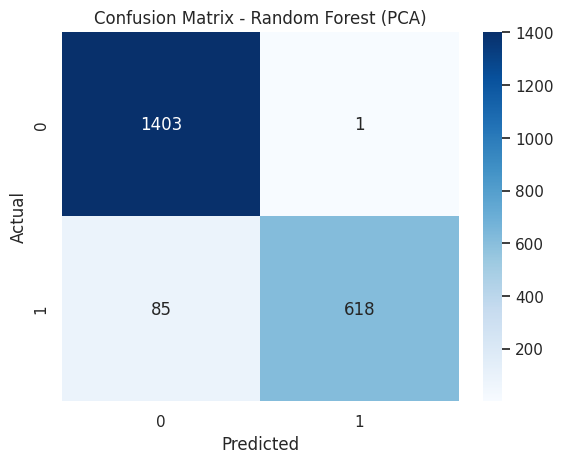

K-Nearest Neighbors (PCA) Performance:
Accuracy: 0.9597
Precision: 0.9889
Recall: 0.8890
F1 Score: 0.9363
ROC-AUC Score: 0.9420



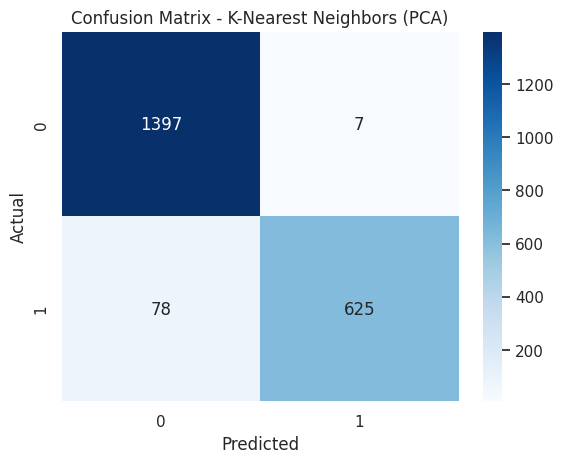

XGBoost (PCA) Performance:
Accuracy: 0.9639
Precision: 0.9953
Recall: 0.8962
F1 Score: 0.9431
ROC-AUC Score: 0.9470



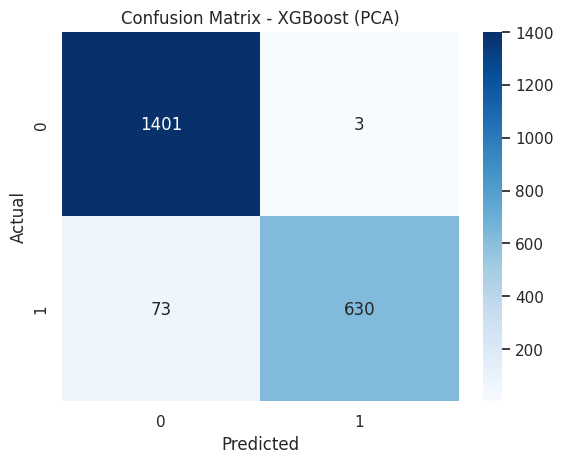

In [126]:
y_pred1 = random_forest_model.predict(X_test_trf)
y_pred2 = knn_model.predict(X_test_trf)
y_pred3 = xgboost_model.predict(X_test_trf)
evaluate_model(y_test, y_pred1, "Random Forest (PCA)")
evaluate_model(y_test, y_pred2, "K-Nearest Neighbors (PCA)")
evaluate_model(y_test, y_pred3, "XGBoost (PCA)")

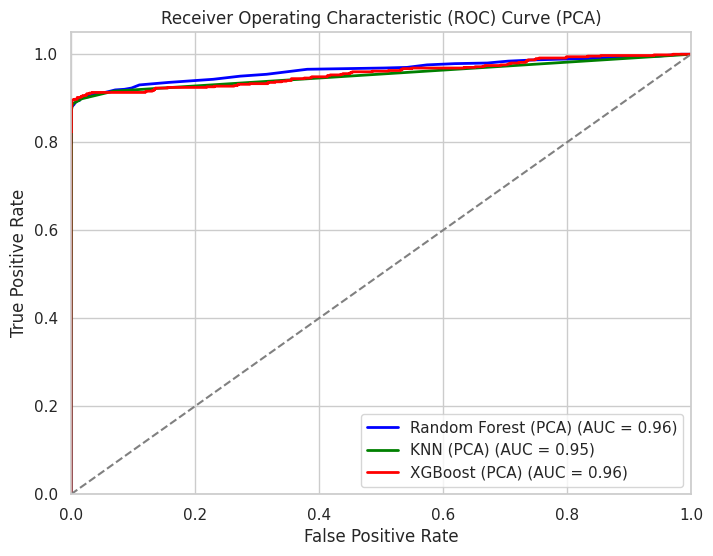

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_prob1 = random_forest_model.predict_proba(X_test_trf)[:, 1]
y_pred_prob2 = knn_model.predict_proba(X_test_trf)[:, 1]
y_pred_prob3 = xgboost_model.predict_proba(X_test_trf)[:, 1]

plt.figure(figsize=(8,6))

# Plot AUC curves for each model
for y_pred_prob, model_name, color in zip(
    [y_pred_prob1, y_pred_prob2, y_pred_prob3],
    ["Random Forest (PCA)", "KNN (PCA)", "XGBoost (PCA)"],
    ["blue", "green", "red"]
):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (PCA)')
plt.legend(loc='lower right')
plt.show()



In [128]:
pca.explained_variance_.shape

(10,)

In [129]:
pca.components_.shape

(10, 10586)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)


In [131]:
loadings = pca.components_
print("Loadings of each principal component:")
print(loadings)

Loadings of each principal component:
[[-3.92369960e-18 -4.06656218e-19 -1.71254483e-18 ... -8.92679703e-02
   2.36122485e-01  1.33384736e-01]
 [ 9.97192593e-16  1.95797301e-17  6.48627448e-17 ...  2.52855576e-01
   1.09954528e-01  4.18046922e-02]
 [-3.11715880e-18  6.35176059e-18  9.59272948e-17 ...  1.84019264e-02
  -1.78655843e-01 -6.47013435e-02]
 ...
 [-1.50263734e-15  1.03285839e-16  4.59907579e-16 ... -2.30196391e-01
   2.77943091e-03 -2.31563412e-02]
 [-3.84462788e-16 -1.16536289e-16  3.23766557e-17 ...  5.00773168e-03
  -1.63416236e-02 -1.95456734e-02]
 [ 9.02316968e-16  1.23471277e-16 -9.45852695e-17 ...  5.54059678e-02
  -6.02666612e-02  1.99663774e-01]]


**importance of PCA**


In [133]:
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add cumulative explained variance line
fig.add_trace(go.Scatter(
    x=list(range(1, len(pca.explained_variance_ratio_) + 1)),
    y=np.cumsum(pca.explained_variance_ratio_),
    mode='lines+markers',
    name='Explained Variance',
    line=dict(color='blue')
))

fig.update_layout(
    template="plotly_dark",  # Dark background
    title="Cumulative Explained Variance",
    xaxis_title="Number of Components",
    yaxis_title="Explained Variance",
    font=dict(color="white"),  # White text for better contrast
)

# Show plot
fig.show()

In [85]:
# export
import pickle
pickle.dump(random_forest_model,open('random_forest_model_D.pkl','wb'))


In [86]:
pipe = pickle.load(open('random_forest_model_D.pkl','rb'))

In [87]:
# Assume user input
test_input2 = np.array([-1.18083380e-17,-3.84527844e-16,7.99843076e-18 ],dtype=object)

In [89]:
# Provided string containing column names
# Define the range of column numbers
start_column = 0
end_column = 10586

# Create a list of column names
column_names = [str(i) for i in range(start_column, end_column + 1)]

# Print the list of column names
print(column_names)



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [61]:
transformed_df = pd.DataFrame(X_train_trf, columns=["PC1", "PC2", "PC3"])
print(transformed_df.head())

        PC1       PC2       PC3
0  4.329538  0.558505 -1.030213
1  4.479150  0.121154 -0.786355
2 -0.722680  1.428102  5.482773
3 -1.588769 -1.312795 -1.524085
4 -0.670311  1.623775  5.450233


In [62]:
pca.explained_variance_

array([10.08623386,  6.03909443,  5.3847014 ])